<a href="https://colab.research.google.com/github/alexxs2/Machine_learning_II/blob/main/FRL_CD_AM2_05_Tarefa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exemplo Prático de Treinamento não supervisionado
Abaixo está um exemplo prático simples e didático, usando o dataset Wine para demonstrar k-means, clustering hierárquico, PCA e t-SNE.

O objetivo é mostrar como o aprendizado não supervisionado (k-means, clustering hierárquico, PCA e t-SNE) pode ser usado para descobrir padrões naturais em dados de vinhos sem usar rótulos prévios.

##Passo 1: Carregar os Dados (Wine Dataset):
- Temos 178 amostras de vinhos, cada uma com 13 características químicas (ex.: álcool, ácido málico, magnésio).
- Esses dados são como uma tabela complicada que não conseguimos entender só olhando.


In [ ]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

# Carregar o dataset Wine
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
wine = load_wine()
X = wine.data  # Dados (13 características químicas de vinhos)
y = wine.target  # Rótulos (apenas para comparação, não usaremos no clustering)

# Padronizar os dados (média 0, desvio padrão 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dados carregados e padronizados!")

Dados carregados e padronizados!


##Passo 2: Agrupamento com K-means
Objetivo: Agrupar os vinhos em 3 clusters e visualizar o resultado.

- O modelo k-means olha essas 13 características e tenta dividir os 178 vinhos em 3 grupos (clusters) baseados em similaridade.
- Exemplo: Vinhos com alto teor alcoólico e baixa acidez podem formar um cluster, enquanto vinhos com alta acidez e baixo álcool formam outro.
- Resultado: Cada vinho ganha um rótulo (0, 1 ou 2) indicando seu grupo, mas esses rótulos são criados pelo modelo, não fornecidos.

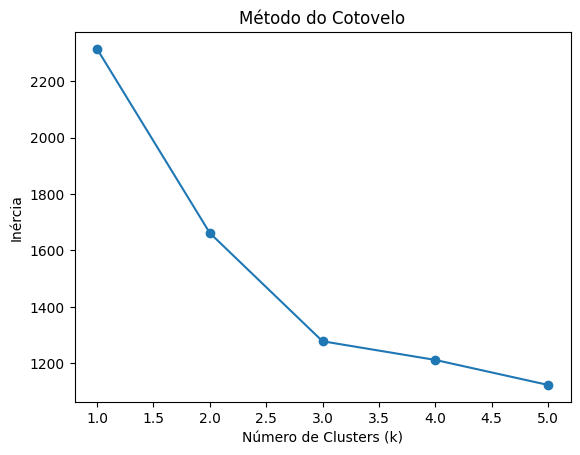

Explicação: O gráfico mostra a inércia (soma das distâncias aos centroides) para diferentes valores de k. O 'cotovelo' em k=3 sugere que 3 clusters é uma boa escolha.


In [ ]:
# Aplicar K-means com k=3 (sabemos que há 3 classes no dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

# Método do cotovelo para escolher k
inertias = []
for k in range(1, 6):
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(X_scaled)
    inertias.append(kmeans_test.inertia_)

# Plotar o gráfico do cotovelo, que  mostra a inércia (soma das distâncias aos centroides) para diferentes valores de k. O "cotovelo" em k=3 sugere que 3 clusters é uma boa escolha.
plt.plot(range(1, 6), inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()

print("Explicação: O gráfico mostra a inércia (soma das distâncias aos centroides) para diferentes valores de k. O 'cotovelo' em k=3 sugere que 3 clusters é uma boa escolha.")

##Passo 3: Agrupamento com Clustering Hierárquico
Objetivo: Criar uma hierarquia de clusters e visualizar com um dendrograma.

- Aqui, o modelo cria uma "árvore" (dendrograma) mostrando como os vinhos se juntam em grupos, começando com cada vinho sozinho e unindo os mais parecidos.
- Exemplo: Primeiro junta dois vinhos quase idênticos, depois junta outros, até formar 3 grupos maiores (se cortarmos a árvore em um certo nível).
- Resultado: Uma visão alternativa dos grupos, comparável ao k-means.

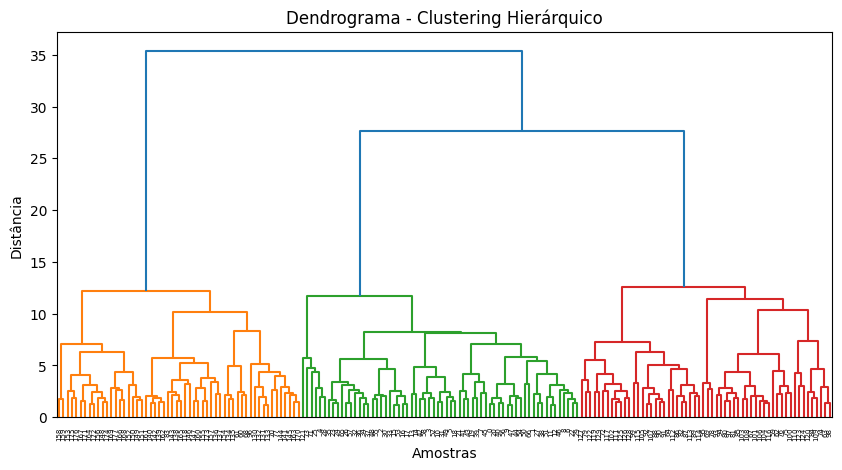

Explicação: O dendrograma mostra como os pontos são agrupados. Cortando em uma altura específica (ex.: 10), podemos obter 3 clusters, similar ao k-means.


In [ ]:
# Calcular a matriz de ligação para clustering hierárquico (método Ward)
Z = linkage(X_scaled, method='ward')

# Plotar o dendrograma, que mostra como os pontos são agrupados. Cortando em uma altura específica (ex.: 10), podemos obter 3 clusters, similar ao k-means.
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma - Clustering Hierárquico')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

print("Explicação: O dendrograma mostra como os pontos são agrupados. Cortando em uma altura específica (ex.: 10), podemos obter 3 clusters, similar ao k-means.")

## Passo 4: Redução de Dimensionalidade com PCA
Objetivo: Reduzir as 13 dimensões para 2 e visualizar os clusters.

- As 13 características são reduzidas a 2 "super-características" (componentes principais) que capturam o máximo de informação possível.
- O modelo plota esses 2 valores em um gráfico 2D, colorindo cada ponto (vinho) pelo grupo do k-means.
- Resultado: Você vê os 3 grupos em um mapa simples, como um "raio-X" dos dados.

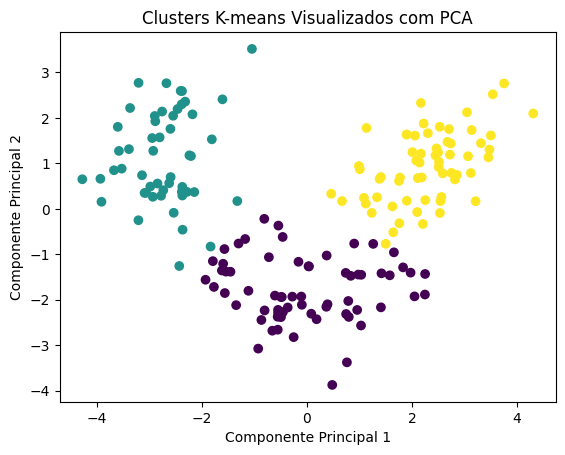

Variância explicada pelos 2 componentes: 55.41%
Explicação: PCA reduz os dados para 2D, mantendo a maior parte da variância (geralmente 50-60% neste caso). Os clusters são visíveis em cores diferentes.


In [ ]:
# Aplicar PCA (Principal Component Analysis - Análise de Componentes Principais)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar os clusters do k-means com PCA, que reduz os dados para 2D, mantendo a maior parte da variância (geralmente 50-60% neste caso). Os clusters são visíveis em cores diferentes.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('Clusters K-means Visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Variância explicada pelos componentes
print(f"Variância explicada pelos 2 componentes: {sum(pca.explained_variance_ratio_):.2%}")

print("Explicação: PCA reduz os dados para 2D, mantendo a maior parte da variância (geralmente 50-60% neste caso). Os clusters são visíveis em cores diferentes.")

##Passo 5: Redução de Dimensionalidade com t-SNE
Objetivo: Comparar com PCA, usando t-SNE para visualizar clusters.

- Similar ao PCA, mas foca em manter vinhos semelhantes próximos no gráfico 2D, mesmo que os dados sejam complicados.
- Resultado: Outro mapa 2D dos grupos, muitas vezes mais separado visualmente que o PCA.

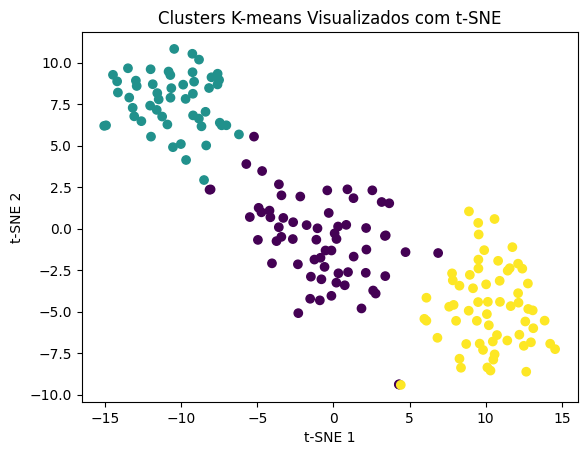

Explicação: t-SNE foca em preservar vizinhanças locais, geralmente mostrando clusters mais separados que o PCA, mas sem garantir variância total explicada.


In [ ]:
# Aplicar t-SNE (t-Distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualizar os clusters do k-means com t-SNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('Clusters K-means Visualizados com t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

print("Explicação: t-SNE foca em preservar vizinhanças locais, geralmente mostrando clusters mais separados que o PCA, mas sem garantir variância total explicada.")

##Conclusão

- O que o modelo faz: Agrupa vinhos semelhantes com base em suas características químicas (como teor alcoólico, acidez, etc.) e reduz essas características complexas (13 dimensões) para algo visualizável (2D), permitindo que você veja esses grupos.
- Por que isso importa: Simula um cenário real, como uma vinícola querendo segmentar seus produtos ou entender como os vinhos se organizam naturalmente, sem saber de antemão quais são as categorias.

###O que o Modelo Está Fazendo, em Resumo
- K-means e Clustering Hierárquico: Descobrem quais vinhos são "parecidos" e os organizam em 3 grupos, como se fosse uma vinícola tentando categorizar seus produtos sem rótulos prévios.
- PCA e t-SNE: Pegam esses dados complicados (13 colunas) e mostram os grupos em um gráfico 2D, como se estivessem "desenhando um mapa" para você entender visualmente.

O modelo não prevê nada (como no aprendizado supervisionado). Ele explora e organiza os vinhos, mostrando como eles se agrupam naturalmente e permitindo visualização. No dataset Wine, como temos rótulos reais (3 tipos de vinho), podemos comparar os grupos encontrados com os reais, mas o foco é aprender a técnica, não acertar os rótulos.